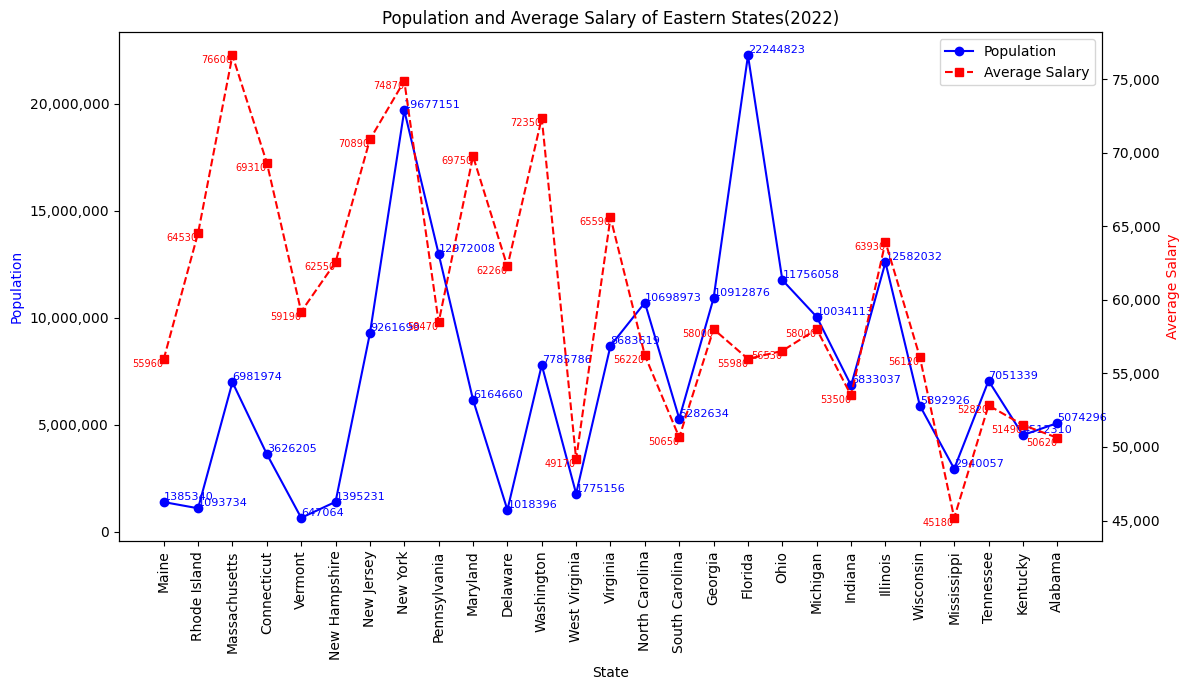

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

df = pd.read_csv("data.csv")

fig, ax1 = plt.subplots(figsize=(12,7))

line1, = ax1.plot(df['State'], df['Population'], marker='o', linestyle='-', color='blue', label='Population')

ax2 = ax1.twinx()  
line2, = ax2.plot(df['State'], df['Average salary'], marker='s', linestyle='--', color='red', label='Average Salary')

for idx, value in enumerate(df['Population']):
    ax1.text(idx, value, str(value), verticalalignment='bottom', horizontalalignment='left', fontsize=8, color='blue')

for idx, value in enumerate(df['Average salary']):
    ax2.text(idx, value, str(value), verticalalignment='top', horizontalalignment='right', fontsize=7, color='red')

ax1.get_yaxis().set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.get_yaxis().set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.set_ylabel('Population', color='blue')
ax2.set_ylabel('Average Salary', color='red')

ax1.set_xticks(range(len(df['State'])))
ax1.set_xticklabels(df['State'], rotation=90)

ax1.legend(handles=[line1, line2], loc='upper right')

plt.title('Population and Average Salary of Eastern States(2022)')
ax1.set_xlabel('State')
plt.tight_layout()
plt.show()

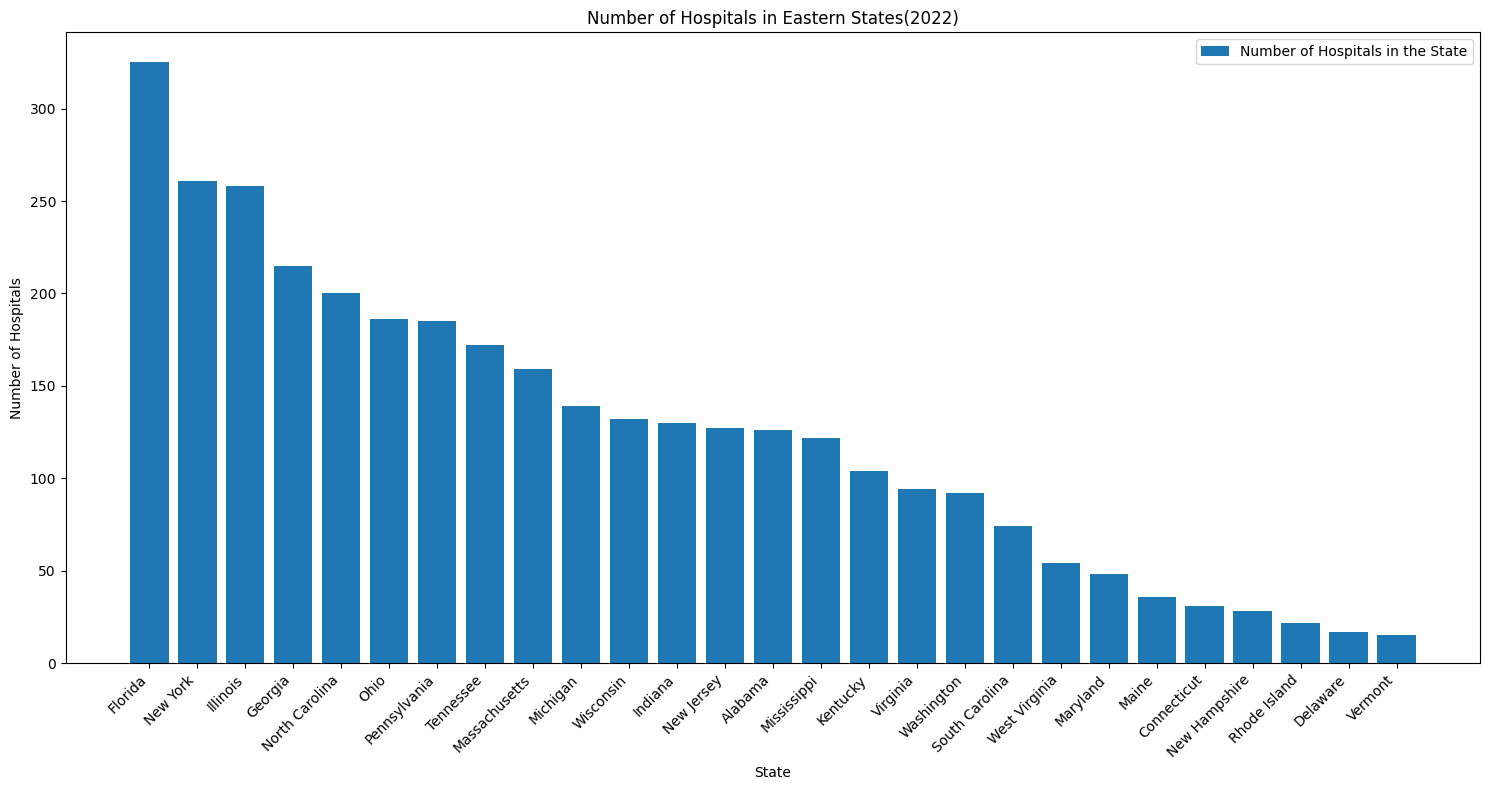

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'data.csv'
data = pd.read_csv(file_path)

# Sorting the data by the number of hospitals
sorted_data = data.sort_values('hospital', ascending=False)

plt.figure(figsize=(15, 8))
plt.bar(sorted_data['State'], sorted_data['hospital'])
plt.xticks(rotation=45, ha="right")
plt.title("Number of Hospitals in Eastern States(2022)")
plt.xlabel("State")
plt.ylabel("Number of Hospitals")

plt.legend(['Number of Hospitals in the State'], loc='upper right')
plt.tight_layout()
plt.show()

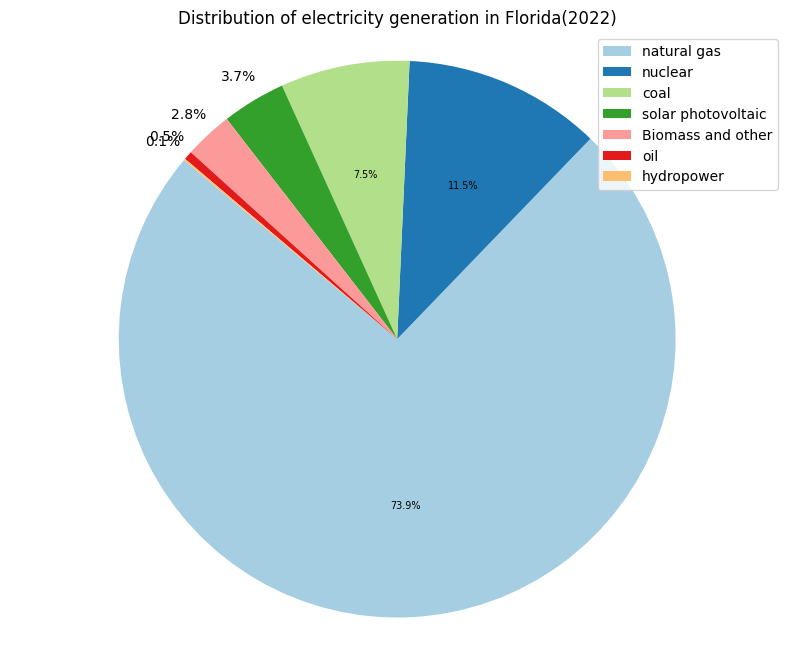

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = 'data1.csv'
data = pd.read_csv(file_path)

def custom_autopct_format(percentage, threshold):
    def inner_autopct(pct):
        return ('%1.1f%%' % pct) if pct > threshold else ''
    return inner_autopct

threshold = 5

plt.figure(figsize=(10, 8))
colors = plt.cm.Paired(range(len(data)))
patches, texts, autotexts = plt.pie(data['percentage'], startangle=140, colors=colors, 
                                    autopct=custom_autopct_format(data['percentage'], threshold),
                                    textprops={'fontsize': 10, 'color': "white"})

specific_percentages = [7.5, 11.5, 73.9]
for autotext, pct in zip(autotexts, data['percentage']):
    if pct in specific_percentages:
        autotext.set_color('black')
        autotext.set_size('x-small')

# Additional labels for small segments
for i, (pct, patch) in enumerate(zip(data['percentage'], patches)):
    if pct <= threshold:
        ang = (patch.theta2 + patch.theta1) / 2
        x = patch.r * 1.1 * np.cos(np.deg2rad(ang))
        y = patch.r * 1.1 * np.sin(np.deg2rad(ang))
        plt.text(x, y, f"{pct:.1f}%", ha='center', va='center', fontsize=10, color='black')

plt.title('Distribution of electricity generation in Florida(2022)')
plt.axis('equal')
plt.legend(patches, data['Source'], loc="best")
plt.show()